In [ ]:
Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
water = pd.read_csv('water.csv', sep=',')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

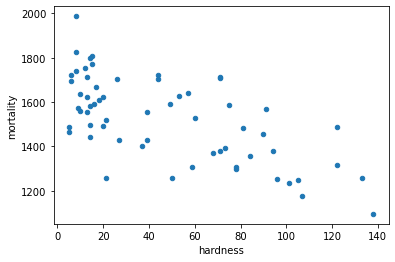

In [4]:
water.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
print('Коэффициент корреляции Пирсона:', water[['hardness', 'mortality']].corr(), sep='\n')
print('Коэффициент корреляции Спирмена:', water[['hardness', 'mortality']].corr(method='spearman'), sep='\n')

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


In [ ]:
# Судя по коэффициентам корреляции, зависимость средняя обратно-отрицательная, т.е. с увеличением жесткости падает смертность.
# Кальций - один из самых необходимых для жизни элементов. Его соединения оставляют основу опорно-двигательной системы,
# зубной ткани. Ионы кальция участвуют в передаче нервных импульсов,
# синтезе гормонов и ферментов, поддержании щелочно-кислотного баланса в организме.

In [6]:
X = water[['hardness']]
y = water['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучаем модель

LinearRegression()

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
y_pred = model.predict(X_test) # возвращаем прогнозируемые значения у
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

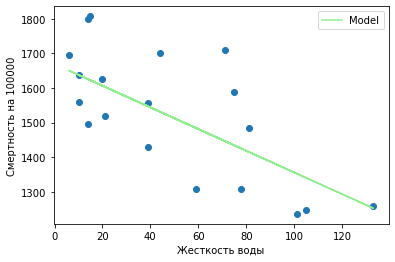

In [10]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='lightgreen', label='Model')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность на 100000')
plt.legend(loc='upper right')

In [11]:
model.score(X_test, y_test) # коэффициент детерминации

0.5046490611017092

In [12]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)
X_const.shape

(42, 2)

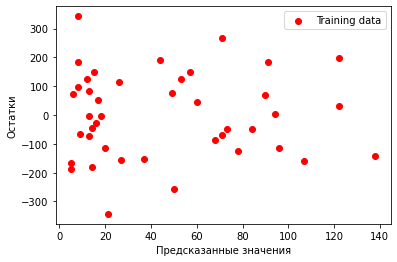

In [14]:
# Распределение остатков на тренировочных данных
model_residuals = sm.OLS(y_train, X_const)
results = model_residuals.fit()
plt.scatter(X_const.iloc[:, 1], results.resid, c='red', label='Training data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper right')

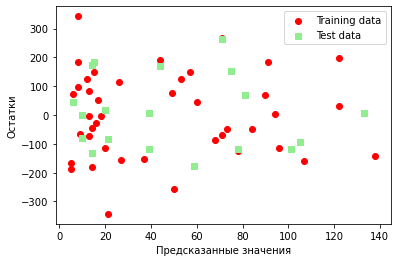

In [16]:
# Распределение остатков на тренировочных и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.scatter(X_train,  y_train - y_train_pred, c='red', marker='o', label='Training data')
plt.scatter(X_test,  y_test - y_test_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper right')

In [42]:
south_loc = water[water['location'] == 'South']
south_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [43]:
north_loc = water[water['location'] == 'North']
north_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

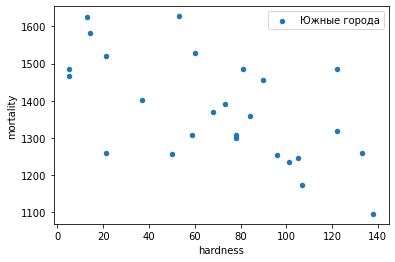

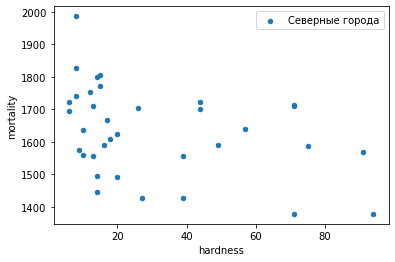

In [21]:
# Строим точечные графики по данным для южных и северных городов
south_loc.plot(kind='scatter', x='hardness', y='mortality', label='Южные города')
north_loc.plot(kind='scatter', x='hardness', y='mortality', label='Северные города')

In [22]:
# Коэффициенты корреляции для южных городов
print('Коэффициент корреляции Пирсона:', south_loc[['hardness', 'mortality']].corr(), sep='\n') 
print('Коэффициент корреляции Спирмена:', south_loc[['hardness', 'mortality']].corr(method='spearman'), sep='\n')

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [23]:
# Коэффициенты корреляции для северных городов
print('Коэффициент корреляции Пирсона:', north_loc[['hardness', 'mortality']].corr(), sep='\n') 
print('Коэффициент корреляции Спирмена:', north_loc[['hardness', 'mortality']].corr(method='spearman'), sep='\n')

Коэффициент корреляции Пирсона:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Коэффициент корреляции Спирмена:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [ ]:
# Для южных городов корелляция более выраженная, чем для северных городов. Но обратная зависимость сохраняется для всех городов

Модель регрессии, коэффициент детерминации и график остатков для южных городов

In [40]:
X = south_loc[['hardness']]
y = south_loc['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model_south_loc = LinearRegression()
model_south_loc.fit(X_train, y_train)  # обучаем модель
y_train_pred = model_south_loc.predict(X_train)
y_test_pred = model_south_loc.predict(X_test)
y_pred = model_south_loc.predict(X_test) # возвращаем прогнозируемые значения у

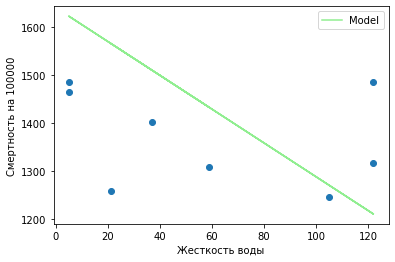

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='lightgreen', label='Model')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность на 100000')
plt.legend(loc='upper right')

In [41]:
model_south_loc.score(X_test, y_test) # коэффициент детерминации

-2.5519223012352077

In [ ]:
# коэффициент детерминации сильно меньше нуля. Считаю что наша модель не рабочая, зависимость в данных не прослеживается. 
# Возможно не хватает данных, либо данные имеют большой разброс.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)
X_const.shape

(18, 2)

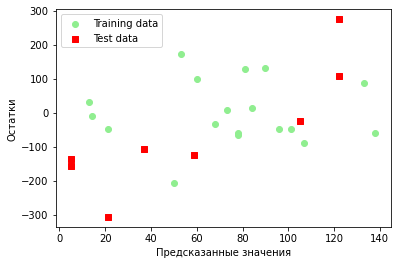

In [28]:
# Распределение остатков на тренировочных и тестовых данных
y_train_pred = model_south_loc.predict(X_train)
y_test_pred = model_south_loc.predict(X_test)
plt.scatter(X_train,  y_train - y_train_pred, c='lightgreen', marker='o', label='Training data')
plt.scatter(X_test,  y_test - y_test_pred, c='red', marker='s', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')

Модель регрессии, коэффициент детерминации и график остатков для южных городов

In [29]:
X = north_loc[['hardness']]
y = north_loc['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model_north_loc = LinearRegression()
model_north_loc.fit(X_train, y_train)  # обучаем модель
y_train_pred = model_north_loc.predict(X_train)
y_test_pred = model_north_loc.predict(X_test)
y_pred = model_north_loc.predict(X_test) # возвращаем прогнозируемые значения у

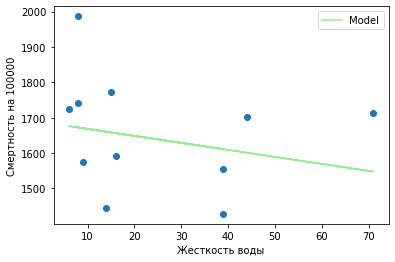

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='lightgreen', label='Model')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность на 100000')
plt.legend(loc='upper right')

In [34]:
model_north_loc.score(X_test, y_test) # коэффициент детерминации

0.018885304285745863

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)
X_const.shape
(18, 2)

(18, 2)

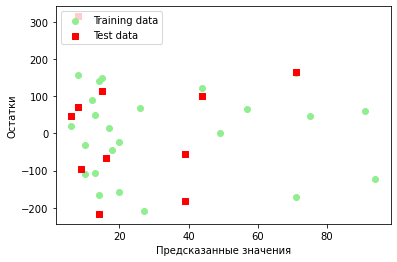

In [36]:
# Распределение остатков на тренировочных и тестовых данных
y_train_pred = model_north_loc.predict(X_train)
y_test_pred = model_north_loc.predict(X_test)
plt.scatter(X_train,  y_train - y_train_pred, c='lightgreen', marker='o', label='Training data')
plt.scatter(X_test,  y_test - y_test_pred, c='red', marker='s', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')